<h1><center><b> Home Credit Default Risk - Group Project </b></center></h1>

### Authors : **Adarsh Fnu**,**Charith Reddy Gopavaram**,**Dheeraj Yata**

## Table of contents:

1. <a href="#1">Introduction</a><br>
2. <a href="#2">EDA</a><br>
    2.1 <a href="#2.1">Import & Inspect Dataset</a><br>
    2.2 <a href="#2.2">Target Variable Exploration</a><br>
    2.3 <a href="#2.3">Explore the relationship between target and predictors</a><br>
    2.4 <a href="#2.4">Missing Value Analysis and Imputation</a><br>
    2.5 <a href="#2.5">Univariate Analysis</a><br>
    2.6 <a href="#2.6">Bivariate Analysis</a><br>
    2.7 <a href="#2.7">EDA Summary</a><br>
3. <a href="#3"> Data Preparation</a><br>
    3.1 <a href="#3.1"> Feature Engineering</a><br>
    3.2 <a href="#3.2"> Data split into train and test set</a><br>
    3.3 <a href="#3.3"> Feature scaling</a><br>
    3.4 <a href="#3.4"> Normalizing</a><br>
4. <a href ="#4"> Modeling </a><br>
    4.1 <a href ="#4.1"> Logistic regression</a><br>
    4.2 <a href ="#4.2"> Random Forest</a><br>
    4.3 <a href ="#4.3"> Tuned Random Forest</a><br>
    4.4 <a href ="#4.4"> Light GBM model </a><br>
    4.5 <a href ="#4.5"> Tuned Light GBM model</a><br>
    4.6 <a href ="#4.6"> ROC-AUC Curve</a><br>
    4.7 <a href ="#4.7"> Sampling Techniques</a><br>
    4.8 <a href ="#4.8"> Feature Importance</a><br>
5. <a href = "#5"> Results </a><br>
    5.1 <a href ="#5.1"> Predictions on test data</a><br>
    5.2 <a href ="#5.2"> Model predictions on application test data</a><br>
    5.3 <a href="#5.3"> Submission File</a><br>
6. <a href ="#6"> Summary and Interpretations </a><br>
7. <a href ="#7"> Group Member's Contribution </a><br>


## 1. Introduction <a name='1'></a>

Home Credit is an international non-banking financial institution that focuses on lending money to people with minimal or no credit history. By providing a safe and comfortable borrowing experience, Home Credit aims to increase the number of people who are not banked and their financial inclusion. The primary problem faced by Home Credit is the challenge of accurately predicting the loan-repaying capabilities of individuals with insufficient or non-existent credit histories.

While Home Credit is currently using statistical and machine learning models, The best analytics approach to solving this problem will primarily be based on a supervised learning technique, focusing on classification models using predictive analysis. The target variable would be the likelihood of a borrower repaying a loan. If we take the target variable as binary ‘0’ and ‘1’, ‘0’ being the client will pay the loan in time, and ‘1’ will have problems paying the loan. This involves Logistic Regression and use of ensemble methods for extracting a list of customers with higher probabilities of loan repayment. The client’s repayment prediction will be based on alternate data to loan history such as telco and transactional information.

Before going to the modeling, EDA is important and in our task EDA can be categorized into the following steps:

1. Import & Inspect Dataset
2. Explore the relationship between target and predictors
3. Exploring missing values
4. Univariate analysis
5. Bivariate analysis

After completing, the EDA process, we jumped into Data preparation and Modeling

1. Data preparation
2. Modeling    
   2.1 Logistic regression model         
   2.2 Random forest model           
   2.3 Gradient Boost model          
   2.4 Sampling 
3. Feature importance
4. Model predictions on test data. 

## 2. EDA <a name='2'></a>

### 2.1 Import and Inspect Dataset <a name='2.1'></a>

In [191]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Setting warnings to be ignored
warnings.filterwarnings('ignore')

### Loading Dataset

In [192]:
# reading the application_train files, bureau files and previous_application files.
application_train = pd.read_csv("application_train.csv")
bureau = pd.read_csv("bureau.csv")
previous_application = pd.read_csv("previous_application.csv")



As we know there are three important files for this home credit data and they are the application_train, bureau, previous_application data. These are used in our model for predicting the loan repayment capabilities. For now, we work on the application_train data and do some analysis.

In [193]:
# checking the shape of application_train
application_train.shape

(307511, 122)

In [194]:
# setting the columns properties to display more columns
pd.options.display.max_columns = 180
pd.options.display.width = 500

application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2.2. Target Variable Exploration <a name = '2.2'></a>

In [195]:
application_train['TARGET'].value_counts(normalize = True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

The above data shows us that the target variable in the dataset is 
unbalanced.Approximately 91.92% of individuals in the training dataset made timely repayments. Given this disproportion, it may be necessary to employ stratified sampling when dividing into training and testing sets, so that we can categorize and simplify. Furthermore, with 91.92% representing the accuracy of the majority class, it serves as the baseline accuracy that our predictive models must surpass.

Text(0.5, 1.0, 'Count of Target Variable Values')

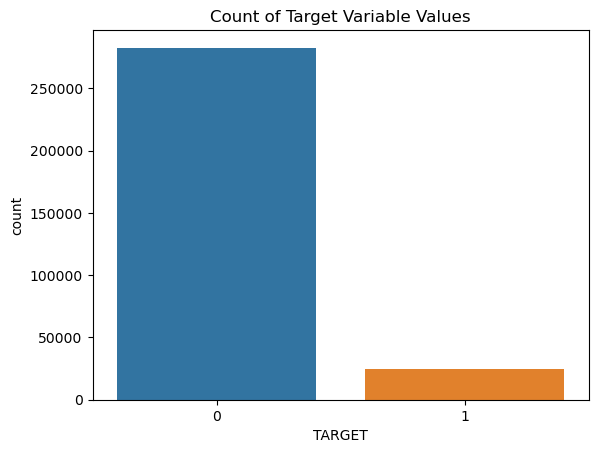

In [196]:
# visulaizing the target variable
sns.countplot(x = 'TARGET', data = application_train)
plt.title('Count of Target Variable Values')

### 2.3 Explore the relationship between target and predictors <a name='2.3'></a>

In [197]:
numeric_data = application_train.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Extract the correlation of all numeric features with 'TARGET', but maintain the 'TARGET' column in the dataframe
target_correlation = correlation_matrix['TARGET']

# Sort the correlations while excluding 'TARGET' from the output, not the dataset
sorted_correlation = target_correlation.drop('TARGET').sort_values(ascending=False)

# Display top positively correlated predictors
print('Positively correlated top 5 predictors:\n', sorted_correlation.head(5))

# Display top negatively correlated predictors
print('Negatively correlated top 5 predictors:\n', sorted_correlation.tail(5))


Positively correlated top 5 predictors:
 DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
Name: TARGET, dtype: float64
Negatively correlated top 5 predictors:
 FLOORSMAX_AVG   -0.044003
DAYS_EMPLOYED   -0.044932
EXT_SOURCE_1    -0.155317
EXT_SOURCE_2    -0.160472
EXT_SOURCE_3    -0.178919
Name: TARGET, dtype: float64


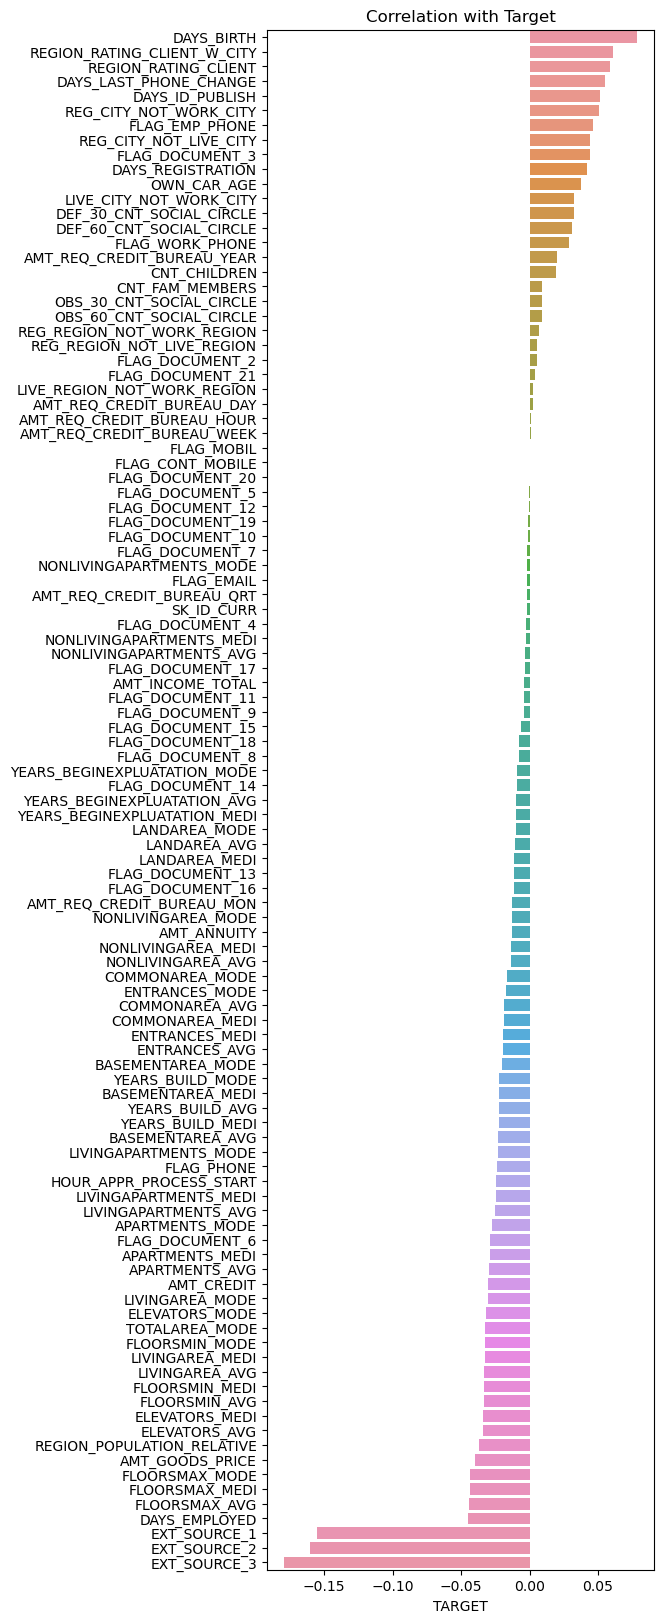

In [198]:
# Visualization of correlation using a barplot
plt.figure(figsize = (5,20))
sns.barplot(x=sorted_correlation, y=sorted_correlation.index)
plt.title("Correlation with Target")
plt.show()

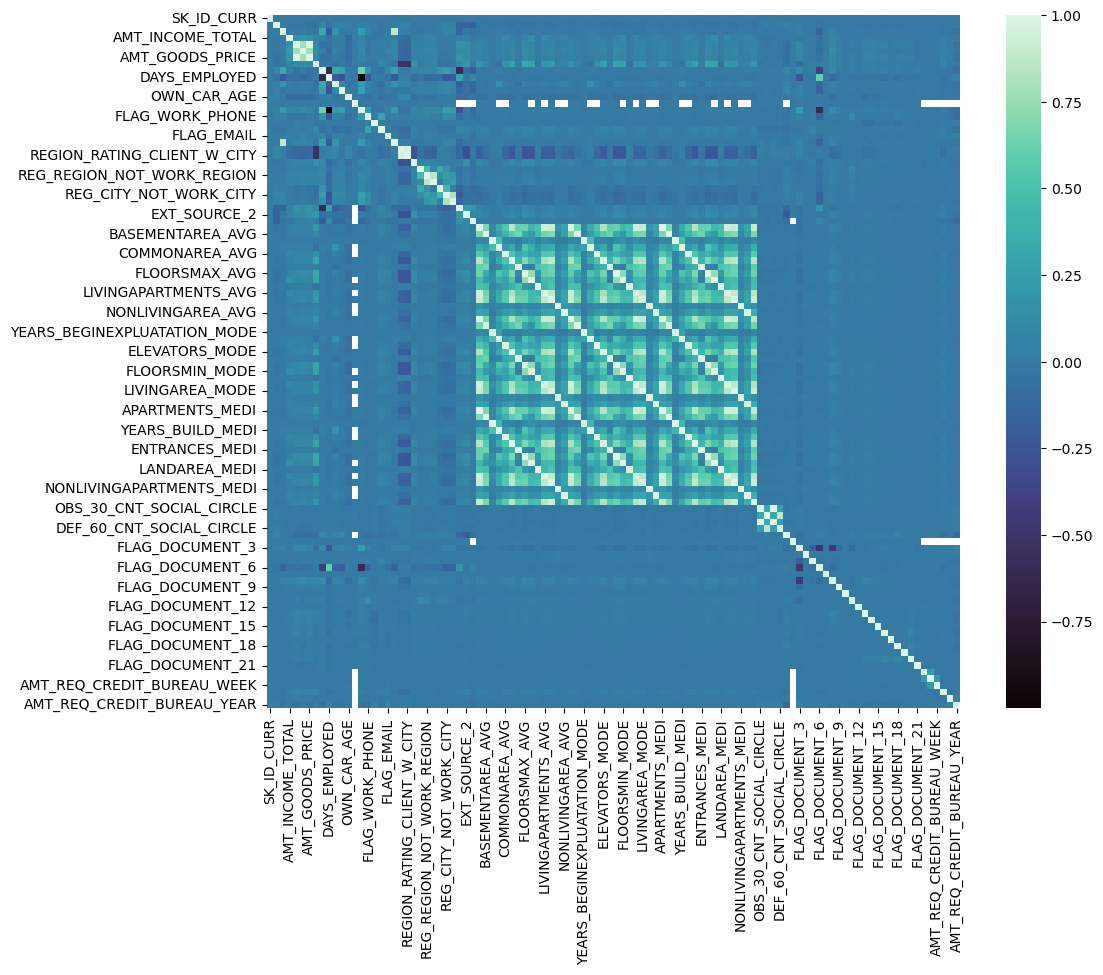

In [199]:
# Visualization of correlation using a heatmap
correlation = numeric_data.corr()

plt.figure(figsize=(12,9))  # Increase the figure size for better readability


sns.heatmap(correlation,cmap= 'mako',square=True)
plt.show()

From the above two graphs we can say that a barplot would be a appropriate model to display the correlation between the target variable and the predictors.

### 2.4 Missing Values analysis and imputation <a name='2.4'></a>

In [200]:
# setting the maximum rows to display more number of rows
pd.options.display.max_rows = 60

# Create a new dataframe and display the results.
missing_info = pd.DataFrame({
                'Column Name': application_train.columns,
                'Missing Percentage': (application_train.isnull().mean() * 100).round()})

In [201]:
# Checking the column missing value along with its correlation with the target variable
correlation = pd.DataFrame(correlation)
missing_cor_df = pd.merge(missing_info, correlation, left_on='Column Name', right_on = correlation.index)
missing_cor_df[missing_cor_df['Missing Percentage']>0].sort_values('Missing Percentage',ascending=False).head(46)

,Column Name,Missing Percentage,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
50,COMMONAREA_MODE,70.0,-0.001058,-0.016340,0.000440,0.075625,0.042341,0.049074,0.043086,0.130931,0.009649,-0.013041,0.029172,-0.000012,-0.030161,NaN,0.013112,0.002186,-0.003946,0.037403,0.018633,0.002608,-0.094231,-0.105387,0.038362,0.011804,0.018961,0.028017,-0.016126,-0.030078,-0.023594,0.027538,0.044244,-0.002645,0.529509,0.402106,0.086286,0.223498,0.977147,0.505149,0.333582,0.378213,0.275966,0.267294,0.523099,0.537318,0.102766,0.220285,0.528205,0.407206,0.046172,0.227029,1.000000,0.507136,0.323693,0.380521,0.277529,0.266000,0.538952,0.537778,0.108027,0.228344,0.531577,0.405356,0.069053,0.223096,0.979887,0.506352,0.332982,0.377027,0.275438,0.269723,0.527031,0.538446,0.104163,0.224874,0.543141,-0.016865,-0.011345,-0.016468,-0.012114,-0.001678,-0.001286,-0.031302,0.003670,0.000170,-0.006928,0.003754,0.044202,0.012667,-0.002710,0.014241,0.004023,0.011701,0.010615,0.008606,0.006884,0.000139,0.013178,0.007075,-0.000797,-0.005049,0.006456,0.005778,-0.007190,0.021797,-0.008781,-0.013145
36,COMMONAREA_AVG,70.0,-0.001463,-0.018550,0.000140,0.089616,0.049537,0.057628,0.050507,0.164806,0.008364,-0.012528,0.028300,0.000100,-0.035524,NaN,0.012612,0.001271,-0.004398,0.046010,0.021449,0.001490,-0.119379,-0.128951,0.045540,0.015360,0.019503,0.029340,-0.017384,-0.034182,-0.026757,0.033381,0.053587,-0.003188,0.538900,0.405459,0.091483,0.232259,1.000000,0.522166,0.326264,0.404014,0.295657,0.257046,0.533103,0.547030,0.105582,0.227615,0.515926,0.388210,0.048141,0.229358,0.977147,0.505542,0.301915,0.398065,0.288792,0.244198,0.526574,0.524186,0.103457,0.217018,0.538120,0.404549,0.074048,0.231841,0.995978,0.520489,0.323738,0.402250,0.294866,0.258217,0.534454,0.545501,0.105081,0.227138,0.553260,-0.020573,-0.012499,-0.020174,-0.013601,-0.003536,-0.001308,-0.037056,0.003594,0.002018,-0.006397,0.003424,0.050414,0.015373,-0.002816,0.014720,0.003793,0.013954,0.011981,0.009015,0.007316,-0.000186,0.015269,0.006676,-0.001106,-0.005055,0.006829,0.005493,-0.008238,0.024331,-0.009804,-0.014049
64,COMMONAREA_MEDI,70.0,-0.001036,-0.018573,0.000609,0

We will remove columns where more than 48% of the data is missing, given that the next highest percentage of missing data in the list drops significantly to only 20%. However, given that External Source 1 is identified as a key predictor in our correlation analysis, we will retain this column. Thus, all columns with a missing value percentage above 48%, except for EXT_SOURCE_1, will be excluded.

In [202]:
# Extracting columns with missing value percent greater than 48
missing_cor_df = missing_cor_df.loc[missing_cor_df['Missing Percentage'] >= 48]
missing_cor_columns = missing_cor_df.loc[missing_cor_df['Column Name'] != 'EXT_SOURCE_1', 'Column Name']

In [203]:
# dropping columns with missing value percent greater than 48
application_train_clean = application_train.drop(columns=missing_cor_columns)

#Checking the shape after dropping the columns
application_train_clean.shape

(307511, 78)

### Missing Value imputation

For the remaining columns with missing values, we will fill in the gaps for categorical variables using the most frequent value (mode) and for numerical variables using the median value.

In [204]:
# Using the mode value
for column in application_train_clean.columns:
    if application_train_clean[column].dtype == 'object':
        application_train_clean[column].fillna(application_train_clean[column].mode()[0], inplace=True)
# Using the median value
for column in application_train_clean.columns:
    if application_train_clean[column].dtype == 'float':
        application_train_clean[column].fillna(application_train_clean[column].median(), inplace=True)

Verifying missing value count in all columns

In [205]:
#verifying missing values count in all columns
application_train_clean.isnull().values.sum()

0

### 2.5 Univariate Analysis <a name ='2.5'></a>

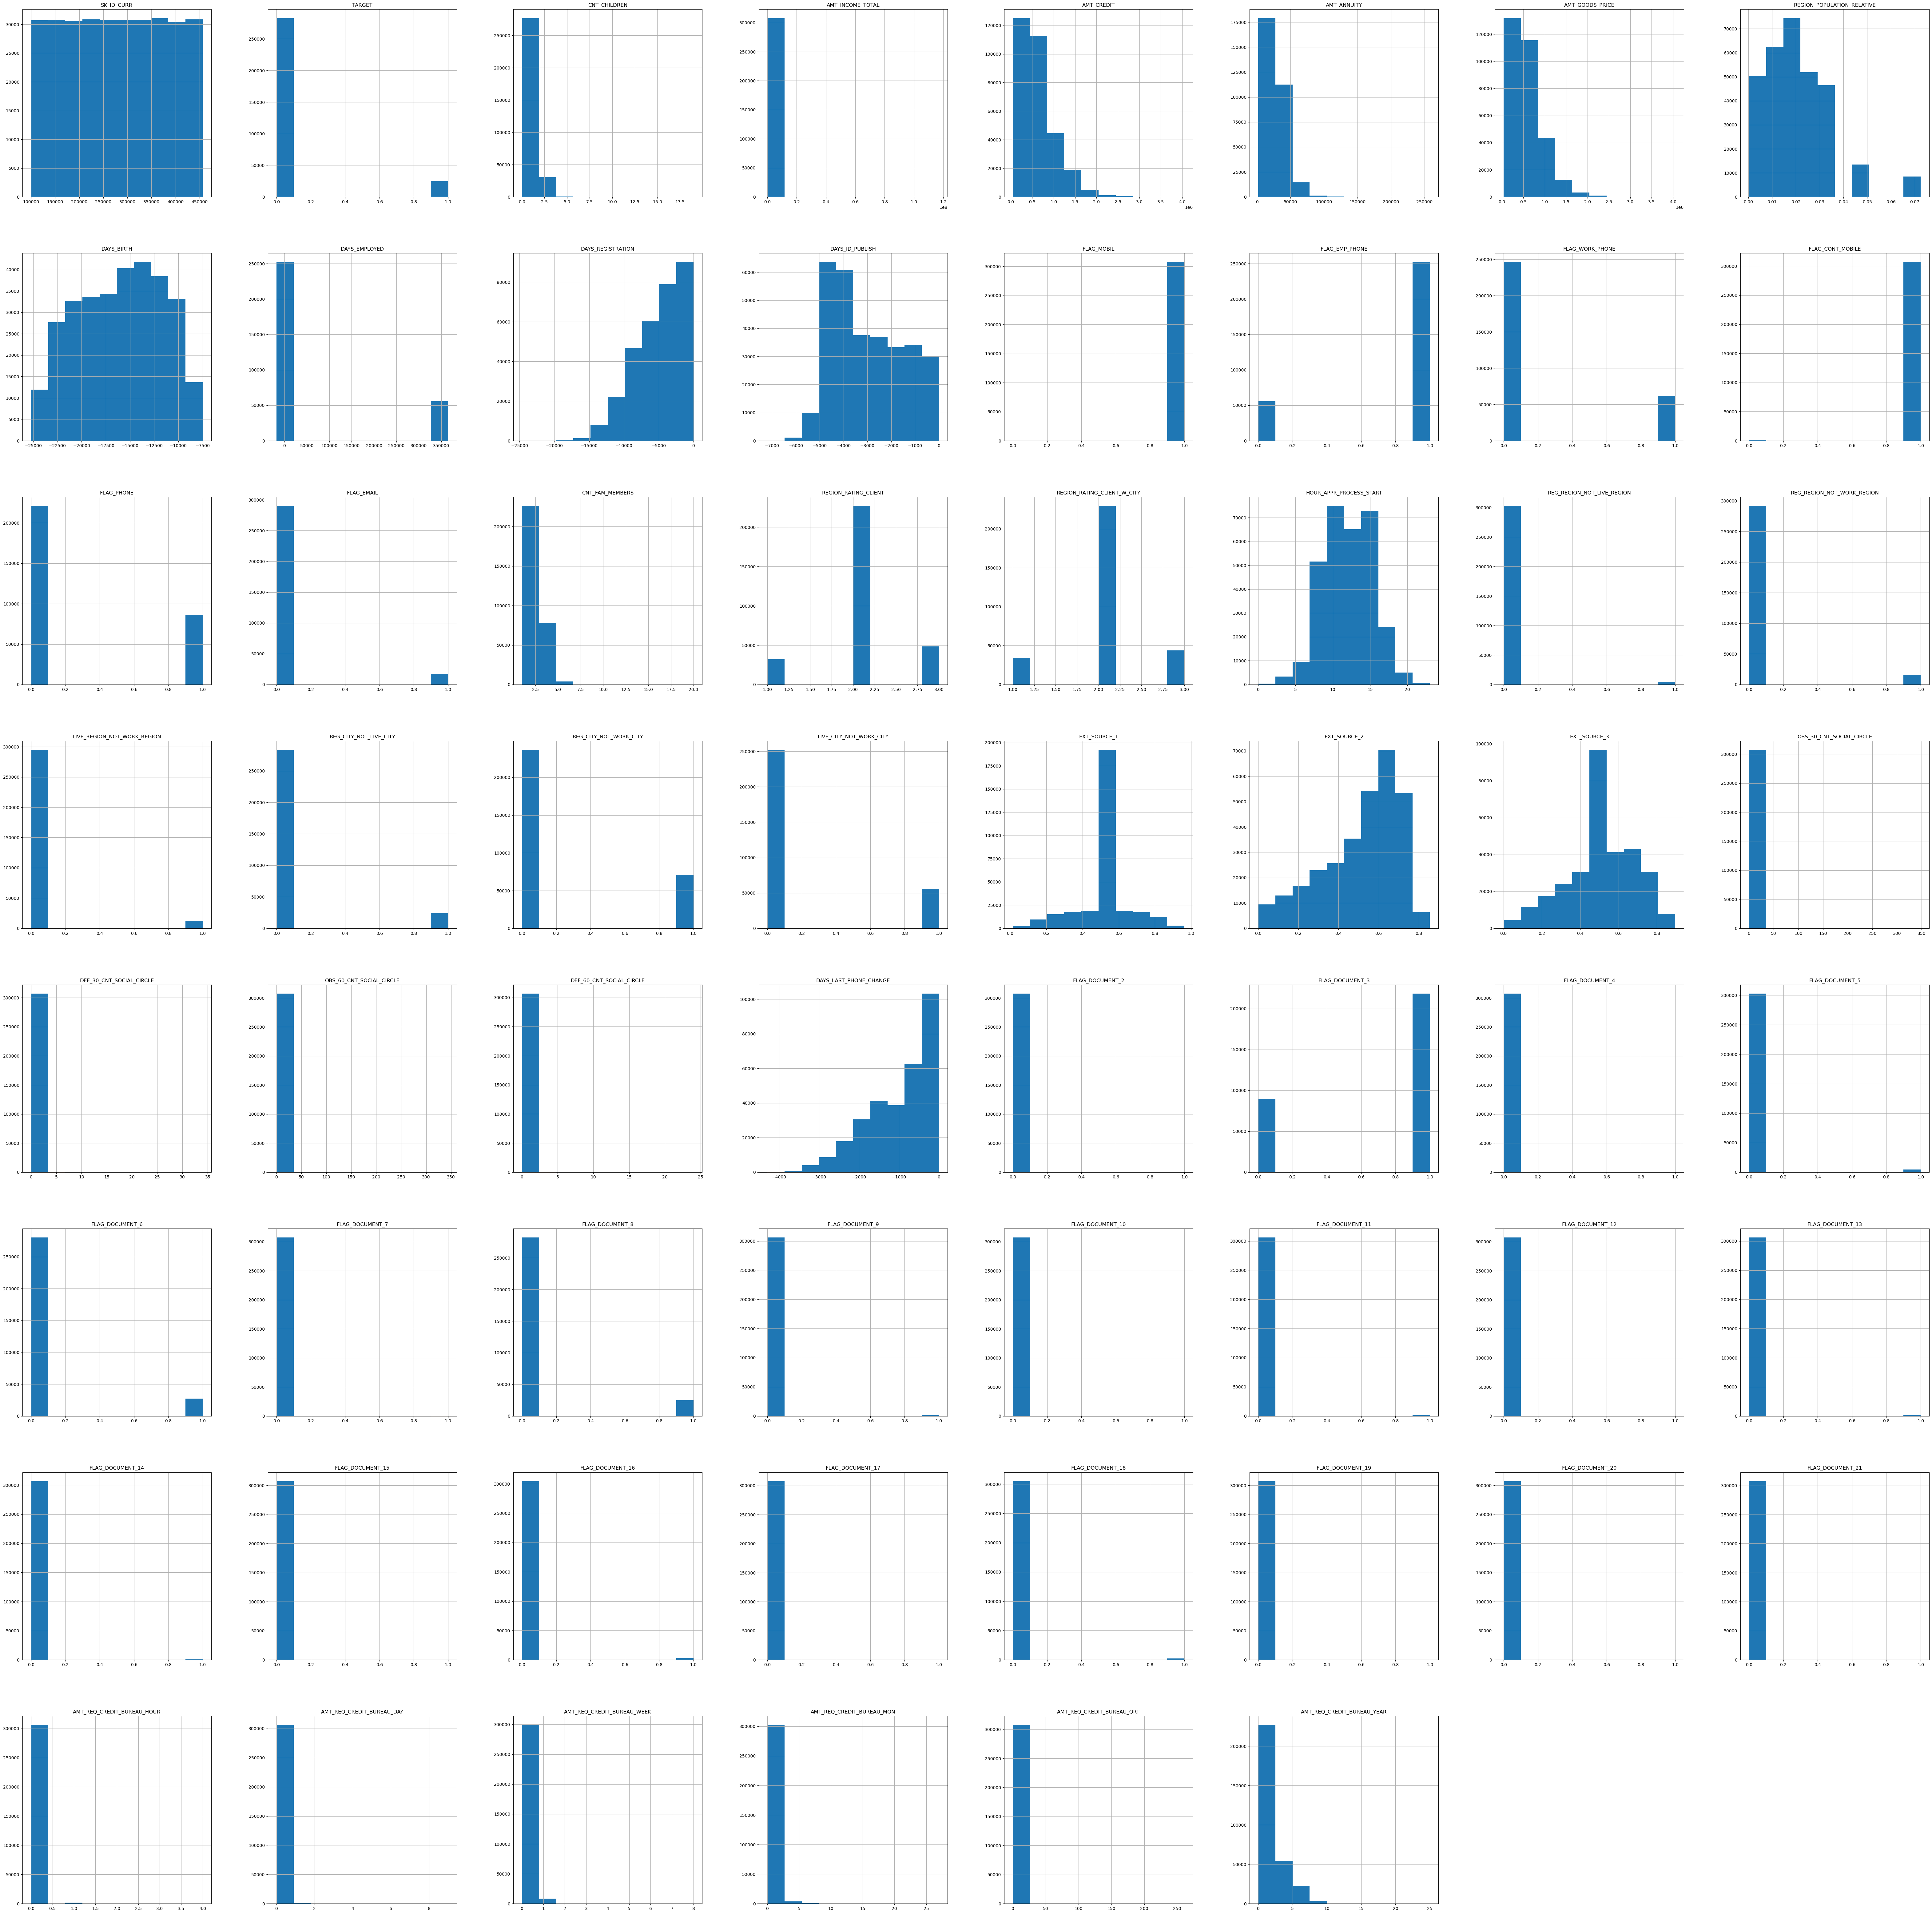

In [206]:
# plotting histogram for all the predictors
application_train_clean.hist(figsize=(80,80))
plt.show()

The plot illustrates that numerous columns contain only one or two distinct values, exhibiting significant imbalance. We will examine these columns further before making a decision on whether to remove them.

### Low Variability Columns

Several columns predominantly consist of the same value, offering little to no variability. Such columns contribute minimally to model development and can be safely dropped.

In [207]:
selected_columns = []

# displaying columns along with a proportion of the unique values
for column in application_train_clean.columns:
    unique_values = application_train_clean[column].value_counts()
    total_count = len(application_train_clean)
    if len(unique_values) < 3: 
        proportions = unique_values / total_count
        if any(proportions > 0.98): 
            column_info = {
                "Column": column,
                "Proportions": proportions
            }
            selected_columns.append(column_info['Column'])
            print(f"Column: {column}")
            print("Proportions:")
            print(proportions)
            print("\n")

Column: FLAG_MOBIL
Proportions:
FLAG_MOBIL
1    0.999997
0    0.000003
Name: count, dtype: float64


Column: FLAG_CONT_MOBILE
Proportions:
FLAG_CONT_MOBILE
1    0.998133
0    0.001867
Name: count, dtype: float64


Column: REG_REGION_NOT_LIVE_REGION
Proportions:
REG_REGION_NOT_LIVE_REGION
0    0.984856
1    0.015144
Name: count, dtype: float64


Column: EMERGENCYSTATE_MODE
Proportions:
EMERGENCYSTATE_MODE
No     0.99243
Yes    0.00757
Name: count, dtype: float64


Column: FLAG_DOCUMENT_2
Proportions:
FLAG_DOCUMENT_2
0    0.999958
1    0.000042
Name: count, dtype: float64


Column: FLAG_DOCUMENT_4
Proportions:
FLAG_DOCUMENT_4
0    0.999919
1    0.000081
Name: count, dtype: float64


Column: FLAG_DOCUMENT_5
Proportions:
FLAG_DOCUMENT_5
0    0.984885
1    0.015115
Name: count, dtype: float64


Column: FLAG_DOCUMENT_7
Proportions:
FLAG_DOCUMENT_7
0    0.999808
1    0.000192
Name: count, dtype: float64


Column: FLAG_DOCUMENT_9
Proportions:
FLAG_DOCUMENT_9
0    0.996104
1    0.003896
Name: c

In [529]:
len(selected_columns)

21

In [208]:
# Dropping the columns with less variability
application_train_clean = application_train_clean.drop(columns =selected_columns)
application_train_clean.shape

(307511, 57)

### 2.6. Bivariate Analysis <a name='2.6'></a>

By doing this analysis, lets check the below Hypothesis:

1. How gender plays a role in loan repayment 
2. More loan credit, More default rate
3. Customers with Higher age.

### Hypothesis 1: Gender role in loan repayment abilities.

Text(0.5, 1.0, 'Count of Target by Gender')

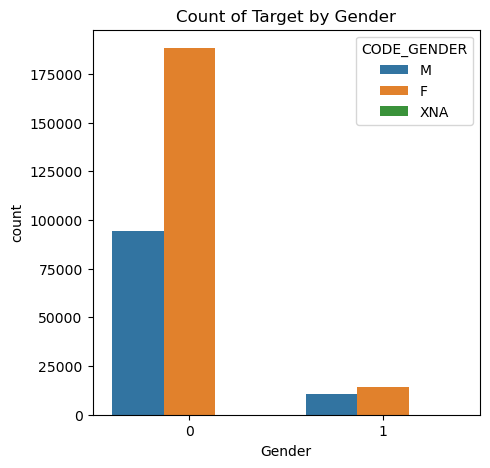

In [209]:
# plotting the target variable with respect to gender
plt.subplots(figsize = (5,5))
sns.countplot(x='TARGET',data=application_train,hue='CODE_GENDER')
plt.xlabel("Gender")
plt.title("Count of Target by Gender")

From the above results, Interestingly, female gender have obtained a larger number of loans compared to male gender, with their numbers nearly doubling among non-defaulters. In cases of repayment challenges, the count of females also surpasses that of males, with a smaller margin. Which tells us that the female gender has more diffculties with loan repayments.

### Hypothesis 2 : More the loan credit amount, Higher the default rate

Text(0.5, 1.0, 'Target v/s Amount of Credit')

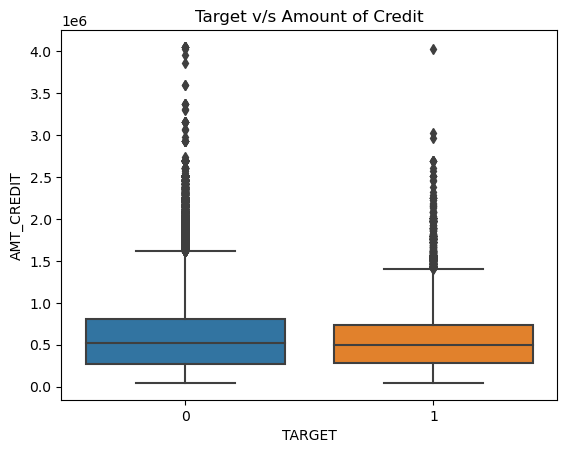

In [210]:
# plotting a Box plot of target variable with respect to AMT_CREDITt
sns.boxplot(application_train, x= 'TARGET', y= 'AMT_CREDIT')

plt.title("Target v/s Amount of Credit")

The above boxplot shows that the customers with the greater proportion of loan credit amount have repaid their loans.

### Hypothesis 3: Customers with higher age have higher chances of default

Text(0.5, 1.0, 'Target vs Age')

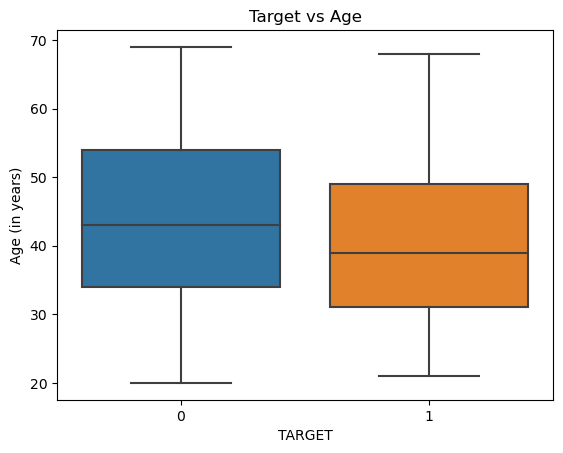

In [211]:
application_train_clean['Year']= (application_train['DAYS_BIRTH'] / (-365)).astype(int)
sns.boxplot(application_train_clean, x='TARGET', y='Year')
plt.ylabel('Age (in years)')

plt.title("Target vs Age")

The box plot shows that the customers with higher age have higher chances of default.

### 2.7 EDA Summary <a name='2.7'></a>

The application train dataset contains over a hundred columns, making Exploratory Data Analysis (EDA) crucial for refining features, imputing missing data, and transforming data to ensure the development of high-quality machine learning models. The EDA provided us some deep insights, summarized as follows:

1. An Accuracy of 91.92% has been found for the majority class, and this could be the benchmark for the classification models while working on next steps.

2. From the correlation matrix, we can see that the DAYS_BIRTH has got more positive correlation among the predictors and EXT_SOURCE_3 has been the most negatively correlated predictor.

3. Columns with missing values more than 48% were dropped except for EXT_SOURCE_1 as it is one of the most important predictor from the correlation matrix. The other missing values in the data have been imputed by mode and median numeric types based on the object type variables.

4. After doing the univariate analysis and plotting the histogram graph, we can see that there are several columns with just 1 or 2 unique values and these columns with large proportion of values having the same value are not useful for  model development, so they are dropped.

5. Later, did bivariate analysis for different hypothesis and found that in gender, females are the one's that have taken more loans and are double the number of defaulters then compared to men. We verified that when a customer has got large credit amount, it does not mean that they have got really mean higher chances of default rate. The last hypothesis, was the age factor, it shows that a higher age is sign of a defaulter, which means that customer with higher age have a good chance of higher default rate.


## 3. Data Preparation <a name='3'></a>

Before performing the data cleaning we first took the back up of the application_train_clean data by storing
it in a variable called data_backup

As part of data cleaning we have converted the categorical variables in the data to dummy varaibles with a value of
0's and 1's by using get dummies function this step was performed as we are about to use this data in machine
learning models which require input data as numerical 

In [212]:
# storing the final application_train_clean to a temp variable for backup
data_backup = application_train_clean

#Get Dummies
application_train_final = pd.get_dummies(application_train_clean)

After exploring the train data set and test data sets, we have come to know that the variables
like NAME_FAMILY_STATUS with value Unknown , NAME_INCOME_TYPE with value Maternity leave 
and CODE_GENDER with value XNA are present in the train data set but not in the test data set, which might create a
data inconsistency between the two data sets, and therefore, these variables are removed from the train data set

In [213]:
application_train_final = application_train_final.drop(columns=['SK_ID_CURR','NAME_FAMILY_STATUS_Unknown', 'NAME_INCOME_TYPE_Maternity leave','CODE_GENDER_XNA'], axis=1)

### 3.1 Feature Engineering <a name='3.1'></a>

After an in-depth analysis of client loan application evaluation and how credit risk operations work,
we have performed feature engineering, where we combine the existing variables to create new variables that can 
improve the performance of the machine learning models, which helps them understand the patterns in the model
to make better predictions 

Here are the few new variables we have created as part of feature engineering : 
    
**AGE_YEARS** = calculated age of each person in years based on the number of days since birth    
**YEARS_EMPLOYED** = calculated employment duration of each person in years          
**Annuity_Income_percent** = calculates the percentage of each person's income used for paying the annuity       
**Credit_Term** = calculates the percentage of the ratio between a total annuity payment and total credit amount                       
**Income_Credit_Ratio** = calculates the percentage of ratio between applicant's total income and total credit amount               
**Income_squared** = income of the applicants has been squared to capture non-linear relationships with other variables             
**AGE_BINNED** = created different age group categories 


In [214]:
# Converting days to years for age and employment time
application_train_final['AGE_YEARS'] = application_train_final['DAYS_BIRTH'] / -365
application_train_final['YEARS_EMPLOYED'] = application_train_final['DAYS_EMPLOYED'] / -365

# Creating income ratios and credit term features
application_train_final['ANNUITY_INCOME_PERCENT'] = application_train_final['AMT_ANNUITY'] / application_train_final['AMT_INCOME_TOTAL']
application_train_final['CREDIT_TERM'] = application_train_final['AMT_ANNUITY'] / application_train_final['AMT_CREDIT']
application_train_final['Income_Credit_Ratio'] = application_train_final['AMT_INCOME_TOTAL'] / application_train_final['AMT_CREDIT']
application_train_final['Income_squared'] = application_train_final['AMT_INCOME_TOTAL'] ** 2


# Creating a binned age category
application_train_final['AGE_BINNED'] = pd.cut(application_train_final['DAYS_BIRTH'] / -365, bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])




### 3.2 Data split into train and test set <a name='3.2'></a>

Here, we have performed a data split of the application train final into 70% as a train set and 30 % as a test set
Here, we will use x_train and y_train for training the models and x_test and y_test to check the performance 
of models

In [215]:
from sklearn.model_selection import train_test_split

def clean_feature_names(df):
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)  
    return df

application_train_final = clean_feature_names(application_train_final)

X = application_train_final.loc[:, application_train_final.columns != 'TARGET']
y = application_train_final['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (215257, 183)
y_train shape: (215257,)
X_test shape: (92254, 183)
y_test shape: (92254,)


### 3.3 Feature Scaling <a name='3.3'></a>

To prevent certain features from predominating over others and to ensure that every feature has an equal
impact on the model throughout model training, we employed feature scaling, also known as "Min-Max scaling," to 
convert and rescale our features.

In [216]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Identify numeric columns (exclude object-type columns for now)
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

# Identify categorical columns for one-hot encoding
categorical_columns = X_train.select_dtypes(include=['object']).columns


# Applying OneHotEncoder to categorical columns and MinMaxScaler to numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns),
       ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data with the same transformer
X_test_scaled = preprocessor.transform(X_test)

# Print the shapes of the transformed arrays
print(X_train_scaled.shape)
print(X_test_scaled.shape)





(215257, 47)
(92254, 47)


### 3.4 Normalizing <a name='3.4'></a>

Numerical columns are standardized using StandardScaler as part of normalization, while categorical columns
are one-hot encoded to prepare the data for machine learning models. The ColumnTransformer applies these changes
to the training and testing datasets to ensure consistent preprocessing.

In [217]:
from sklearn.preprocessing import StandardScaler


# Identify numeric columns (we'll normalize these)
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

# Identify categorical columns for one-hot encoding
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Create a column transformer:
# - StandardScaler for numeric columns to normalize them
# - OneHotEncoder for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Fit and transform the training data
X_train_normalized = preprocessor.fit_transform(X_train)

# Transform the test data with the same transformer
X_test_normalized = preprocessor.transform(X_test)

# Printing the shapes of the transformed arrays
print(X_train_normalized.shape)
print(X_test_normalized.shape)


(215257, 47)
(92254, 47)


## 4. Modeling <a name='4'></a>

### 4.1 Logistic Regression <a name='4.1'></a>

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# Logistic Regression model with balanced class weights to handle class imbalance
logistic_regression = LogisticRegression(max_iter=100, random_state=42, class_weight='balanced')

# Fit the model on the scaled and normalized training data
logistic_regression.fit(X_train_normalized, y_train)

# Predictions on the training data (for training AUC and accuracy)
y_train_pred_probs = logistic_regression.predict_proba(X_train_normalized)[:, 1]
y_train_pred = logistic_regression.predict(X_train_normalized)

# Predict on the scaled and normalized test data (for testing AUC and accuracy)
y_test_pred_probs = logistic_regression.predict_proba(X_test_normalized)[:, 1]
y_test_pred = logistic_regression.predict(X_test_normalized)

# AUC for training and testing
lg_roc_auc_train = roc_auc_score(y_train, y_train_pred_probs)
lg_roc_auc_test = roc_auc_score(y_test, y_test_pred_probs)

# Accuracy for training and testing
lg_accuracy_train = accuracy_score(y_train, y_train_pred)
lg_accuracy_test = accuracy_score(y_test, y_test_pred)

# Printing results
print("Logistic Regression Train AUC:", lg_roc_auc_train)
print("Logistic Regression Test AUC:", lg_roc_auc_test)
print("Logistic Regression Train Accuracy:", lg_accuracy_train)
print("Logistic Regression Test Accuracy:", lg_accuracy_test)


Logistic Regression Train AUC: 0.737133681638353
Logistic Regression Test AUC: 0.7369918727826585
Logistic Regression Train Accuracy: 0.6829928875716005
Logistic Regression Test Accuracy: 0.6826695861426063


AUC score of 0.737 in both test and train data sets explains that the model can effectively
discriminate between two classes, separating loan default cases from non-default cases.

An accuracy score of 0.6829 explains that the model can make correct predictions up to 68.2% of total cases.

### 4.2 Random Forest Model <a name='4.2'></a>

In [219]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model on the scaled and normalized training data
random_forest.fit(X_train_normalized, y_train)

# Predictions on the training data (for training AUC and accuracy)
y_train_pred_rf_probs = random_forest.predict_proba(X_train_normalized)[:, 1]
y_train_pred_rf = random_forest.predict(X_train_normalized)

# Predict on the scaled and normalized test data (for testing AUC and accuracy)
y_test_pred_rf_probs = random_forest.predict_proba(X_test_normalized)[:, 1]
y_test_pred_rf = random_forest.predict(X_test_normalized)

# AUC for training and testing
rf_roc_auc_train = roc_auc_score(y_train, y_train_pred_rf_probs)
rf_roc_auc_test = roc_auc_score(y_test, y_test_pred_rf_probs)

# Accuracy for training and testing
rf_accuracy_train = accuracy_score(y_train, y_train_pred_rf)
rf_accuracy_test = accuracy_score(y_test, y_test_pred_rf)

# Printing results
print("Random Forest Train AUC:", rf_roc_auc_train)
print("Random Forest Test AUC:", rf_roc_auc_test)
print("Random Forest Train Accuracy:", rf_accuracy_train)
print("Random Forest Test Accuracy:", rf_accuracy_test)

Random Forest Train AUC: 1.0
Random Forest Test AUC: 0.7240750833691043
Random Forest Train Accuracy: 0.9999674807323339
Random Forest Test Accuracy: 0.9196999588093742


### 4.3 Tuned Random Forest Model <a name='4.3'></a>

**Cross-validation** : 
Cross-validation is used here by the RandomizedSearchCV to ensure that each hyperparameter setting is 
carefully evaluated. This design divides the data into three parts (cv=3), where two sections 
are used for training, and one section serves as the validation set on alternating occasions. This method 
helps to improve the accuracy of assessing the model's performance by reducing the variance associated with
a single model-test split trial. 

**Tuning** :
A hyperparameter grid is built by the code to optimize a RandomForestClassifier, with particular attention paid to variables such as min_samples_leaf, max_features, max_depth, and n_estimators. When generating an instance of RandomForestClassifier, a fixed random state is employed for consistency's sake.The objective is to optimize the ROC AUC statistic by exploring 100 different parameter combinations from thisgrid using RandomizedSearchCV and 3-fold cross-validation. For thorough progress reporting, this optimization process is set to a verbosity level of 2, and it utilizes a large number of cores (n_jobs=-1) to maximize efficiency. This strategy ensures a comprehensive search for the optimal model parameters by accounting for computing cost and performance.

In [225]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier object
rf = RandomForestClassifier(random_state=42)

# Setup the randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=100, scoring='roc_auc', n_jobs=-1, cv=3, verbose=2, random_state=42)


# Fit the random search model
random_search.fit(X_train_normalized, y_train)

# Get the best estimator
best_rf = random_search.best_estimator_

# Predictions on the training data (for training AUC and accuracy)
y_train_pred_best = best_rf.predict_proba(X_train_normalized)[:, 1]
y_train_pred_binary_best = best_rf.predict(X_train_normalized)

# Predict on the scaled and normalized test data
y_test_pred_best = best_rf.predict_proba(X_test_normalized)[:, 1]
y_test_pred_binary_best = best_rf.predict(X_test_normalized)

# Calculate AUC and accuracy
best_rf_roc_auc_train = roc_auc_score(y_train, y_train_pred_best)
best_rf_roc_auc_test = roc_auc_score(y_test, y_test_pred_best)
best_rf_accuracy_train = accuracy_score(y_train, y_train_pred_binary_best)
best_rf_accuracy_test = accuracy_score(y_test, y_test_pred_binary_best)

# Printing results
print("Best Random Forest Train AUC:", best_rf_roc_auc_train)
print("Best Random Forest Test AUC:", best_rf_roc_auc_test)
print("Best Random Forest Train Accuracy:", best_rf_accuracy_train)
print("Best Random Forest Test Accuracy:", best_rf_accuracy_test)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 1.5min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  30.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.7min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 3.0min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 3.1min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  34.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimator

### 4.4 Light Gradient Boosting Model <a name='4.4'></a>

In [ ]:
# from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
# import lightgbm as lgb

# # Create a LightGBM classifier
# clf = lgb.LGBMClassifier(n_jobs=-1)

# # Define the hyperparameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1],
#     'colsample_bytree': [0.8, 0.9, 1],
#     'num_leaves': [31, 61, 91],
#     'reg_alpha': [0.1, 0.5],
#     'reg_lambda': [0.1, 0.5]
# }

# # Create a StratifiedKFold cross-validator
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=30)

# # Perform grid search using ROC AUC as the scoring metric
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)

# # Fit the model with the best parameters
# grid_search.fit(X_train_normalized, y_train)

# # Best model
# best_clf = grid_search.best_estimator_

# # Predict on the test set using probabilities to calculate ROC AUC
# y_pred_proba = best_clf.predict_proba(X_test_normalized)[:, 1]
# auc_score = roc_auc_score(y_test, y_pred_proba)

# # Calculate accuracy based on the threshold (you can adjust the threshold as needed)
# y_pred_labels = (y_pred_proba >= 0.5).astype(int)
# accuracy = accuracy_score(y_test, y_pred_labels)

# # Print results
# print(f"Best Hyperparameters: {grid_search.best_params_}")
# print(f"ROC AUC Score: {auc_score:.2f}")
# print(f"Accuracy: {accuracy:.2f}")


best_hyperparameters = {'learning_rate': 0.05,          
                                                          'n_estimators': 300,           
                         'max_depth': 10,            
                        'subsample': 0.8,        
                        'colsample_bytree': 0.9,        
                        'num_leaves': 50,         
                        'reg_alpha': 0.1,           
                        'reg_lambda': 0.3 }


this are the best parameters obtained after implementing gridsearchcv on LGBM 

### 4.5 Tuned LGBM Model <a name='4.5'></a>


In [244]:
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Best hyperparameters 
best_hyperparameters = {
    'learning_rate': 0.05,
    'n_estimators': 300,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'num_leaves': 50,
    'reg_alpha': 0.1,
    'reg_lambda': 0.3
}

# Create a LightGBM classifier with the best hyperparameters
best_clf = lgb.LGBMClassifier(
    learning_rate=best_hyperparameters['learning_rate'],
    n_estimators=best_hyperparameters['n_estimators'],
    max_depth=best_hyperparameters['max_depth'],
    subsample=best_hyperparameters['subsample'],
    colsample_bytree=best_hyperparameters['colsample_bytree'],
    num_leaves=best_hyperparameters['num_leaves'],
    reg_alpha=best_hyperparameters['reg_alpha'],
    reg_lambda=best_hyperparameters['reg_lambda'],
    random_state=42,
    n_jobs=-1
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=[np.number]).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns)
    ])

# Create a pipeline with preprocessor and the LightGBM model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', best_clf)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC AUC scores and accuracy
train_auc_score = roc_auc_score(y_train, y_train_pred_proba)
test_auc_score = roc_auc_score(y_test, y_test_pred_proba)
y_train_pred_labels = (y_train_pred_proba >= 0.5).astype(int)
y_test_pred_labels = (y_test_pred_proba >= 0.5).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred_labels)
test_accuracy = accuracy_score(y_test, y_test_pred_labels)

# Print results
print(f"Train ROC AUC Score: {train_auc_score:.2f}")
print(f"Test ROC AUC Score: {test_auc_score:.2f}")
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


[LightGBM] [Info] Number of positive: 17412, number of negative: 197845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4880
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080889 -> initscore=-2.430324
[LightGBM] [Info] Start training from score -2.430324
Train ROC AUC Score: 0.85
Test ROC AUC Score: 0.76
Train Accuracy: 0.92
Test Accuracy: 0.92


From the above output of the tuned lgbm model, There is a difference of 0.11 in ROC and Auc score of train and test sets
which shows that the model can perform well in distinguishing between two classes, indicates that there is a small 
amount of overfitting during training and when it comes to the accuracy of 0.92 shows that the model performs consistently
across both data sets

### 4.6 ROC and AUC Curve <a name='4.6'></a>

The ROC curve and AUC metric are often used in comparative studies of different model performances 
because they provide a reliable assessment of a model's ability to differentiate between classes at different 
threshold levels. The AUC provides a single number that summarizes the model's performance across all thresholds, 
which helps compare models with varying class distributions.   

As a result, ROC and AUC are reliable metrics for evaluating and selecting the best model for binary classification
problems.          

Below, we have implemented the ROC and AUC curves to evaluate the performance of all models.

[LightGBM] [Info] Number of positive: 17412, number of negative: 197845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4880
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080889 -> initscore=-2.430324
[LightGBM] [Info] Start training from score -2.430324


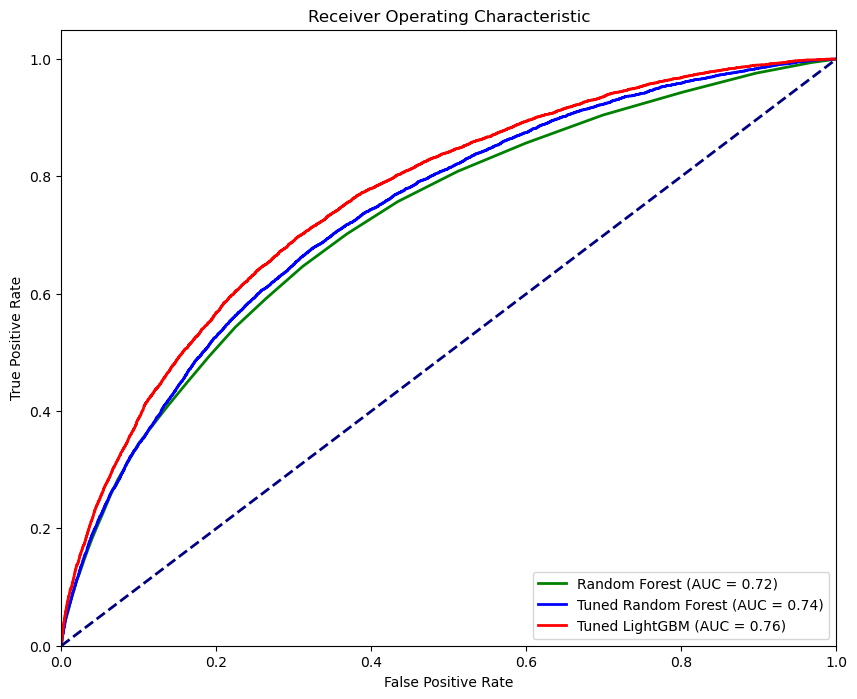

In [221]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Define DataFrame and clean feature names
def clean_feature_names(df):
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)  
    return df

application_train_final = clean_feature_names(application_train_final)
X = application_train_final.loc[:, application_train_final.columns != 'TARGET']
y = application_train_final['TARGET']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess data
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])
X_train_normalized = preprocessor.fit_transform(X_train)
X_test_normalized = preprocessor.transform(X_test)

# Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_forest.fit(X_train_normalized, y_train)
y_test_pred_rf_probs = random_forest.predict_proba(X_test_normalized)[:, 1]

# Tuned Random Forest Model
tuned_random_forest = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, class_weight='balanced')
tuned_random_forest.fit(X_train_normalized, y_train)
y_test_pred_best = tuned_random_forest.predict_proba(X_test_normalized)[:, 1]

# LightGBM Model
best_clf = LGBMClassifier(
    learning_rate=0.05, n_estimators=300, max_depth=10, subsample=0.8,
    colsample_bytree=0.9, num_leaves=50, reg_alpha=0.1, reg_lambda=0.3,
    random_state=42)
best_clf.fit(X_train_normalized, y_train)
y_test_pred_proba = best_clf.predict_proba(X_test_normalized)[:, 1]

# Calculate ROC curve and ROC area for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_pred_rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_test_pred_best)
roc_auc_rf_best = auc(fpr_rf_best, tpr_rf_best)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Plotting all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf, color='green', lw=2)
plt.plot(fpr_rf_best, tpr_rf_best, label='Tuned Random Forest (AUC = %0.2f)' % roc_auc_rf_best, color='blue', lw=2)
plt.plot(fpr_lgbm, tpr_lgbm, label='Tuned LightGBM (AUC = %0.2f)' % roc_auc_lgbm, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


From the above ROC and AUC curve Tuned light GBM has Auc of 0.76 which highest among the other 
two models 

### 4.7 Sampling Techniques <a name='4.7'></a>

When working with imbalanced datasets, the target variable, loan default, and non-default are unevenly distributed.

Sampling methods such as upsampling and downsampling become critical. 

Downsampling the majority class (non-default cases) or upsampling the minority class (default cases) helps balance the class distribution and reduce model bias towards the more frequent class.

Maintaining this balance strengthens the model's ability to forecast uncommon events, leading to better overall predictive performance and fairness.

By using these concepts, we can ensure that each class has an equal impact on model training.
This will lead to more accurate and in-depth estimated insights.


### Down Sampling

Downsampling equalizes the distribution of classes in an imbalanced dataset by randomly eliminating samples, resulting in a smaller dominating class. This strategy assigns equal weight to each class during model training, reducing bias towards the most prevalent one. It improves prediction accuracy and generalizability by identifying trends in minority classes.

We performed downsampling on the data set, used it for various models, and analyzed the results using ROC, AUC, and accuracy.

In [268]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import lightgbm as lgb


# Define DataFrame and clean feature names
def clean_feature_names(df):
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)
    return df

# Load the dataset and clean feature names
application_train_final = clean_feature_names(application_train_final)

# Separate majority and minority classes
majority_class = application_train_final[application_train_final['TARGET'] == 0]
minority_class = application_train_final[application_train_final['TARGET'] == 1]

# Downsample majority class
n_samples_majority = int(len(majority_class) * 0.5)
majority_downsampled = resample(majority_class, replace=False, n_samples=n_samples_majority, random_state=42)

# Combine downsampled majority class with minority class
data_downsampled = pd.concat([majority_downsampled, minority_class])

# Split data into features and target
X = data_downsampled.drop(columns=['TARGET'])
y = data_downsampled['TARGET']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing for numeric and categorical data
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data and transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Logistic Regression Model
lr_model_ds = LogisticRegression(max_iter=100, random_state=42, class_weight='balanced') 
lr_model_ds.fit(X_train_transformed, y_train)
lr_pred = lr_model_ds.predict_proba(X_test_transformed)[:, 1]
lr_auc = roc_auc_score(y_test, lr_pred)
print("Logistic Regression Test ROC AUC Score:", lr_auc)

# Random Forest Model
rf_model_ds = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_ds.fit(X_train_transformed, y_train)
rf_pred = rf_model_ds.predict_proba(X_test_transformed)[:, 1]
rf_auc = roc_auc_score(y_test, rf_pred)
print("Random Forest Test ROC AUC Score:", rf_auc)
                            
# Tuned Random Forest Model
rf_model_1_ds = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, class_weight='balanced')
rf_model_1_ds.fit(X_train_transformed, y_train)
rf_pred_1 = rf_model_1_ds.predict_proba(X_test_transformed)[:, 1]
rf_auc_1 = roc_auc_score(y_test, rf_pred_1)
print("Tuned Random Forest Test ROC AUC Score:", rf_auc_1)

# LightGBM Model
lgb_model_ds = lgb.LGBMClassifier()
lgb_model_ds.fit(X_train_transformed, y_train)
lgb_pred = lgb_model_ds.predict_proba(X_test_transformed)[:, 1]
lgb_auc = roc_auc_score(y_test, lgb_pred)
print("LightGBM Test ROC AUC Score:", lgb_auc)

# Tuned LightGBM Model
lgb_model_lt_ds = lgb.LGBMClassifier(
    learning_rate=0.05, n_estimators=300, max_depth=8, subsample=0.9,
    colsample_bytree=0.8, num_leaves=50, reg_alpha=0.1, reg_lambda=0.3, random_state=42)
lgb_model_lt_ds.fit(X_train_transformed, y_train)
lgb_pred_lt = lgb_model_lt_ds.predict_proba(X_test_transformed)[:, 1]
lgb_auc_lt = roc_auc_score(y_test, lgb_pred_lt)
print("Tuned LightGBM Test ROC AUC Score:", lgb_auc_lt)


Logistic Regression Test ROC AUC Score: 0.7355796485140655
Random Forest Test ROC AUC Score: 0.7306659843358605
Tuned Random Forest Test ROC AUC Score: 0.7356347850570069
[LightGBM] [Info] Number of positive: 17298, number of negative: 99019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4866
[LightGBM] [Info] Number of data points in the train set: 116317, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148714 -> initscore=-1.744721
[LightGBM] [Info] Start training from score -1.744721
LightGBM Test ROC AUC Score: 0.7563033765838627
[LightGBM] [Info] Number of positive: 17298, number of negative: 99019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008017 seconds.
You can set `force_row_wise=true` to remove the

### Up Sampling


Up-sampling is getting samples from the minority class to match the majority class in an imbalanced dataset. This strategy balances the distribution of classes to prevent the training algorithm from disregarding less prevalent courses. Upsampling enhances model performance by giving equal weight to both groups. This allows for a more accurate prediction of minority class results.

We upsampled the data set, used it for various models, and analyzed their performance using ROC, AUC, and accuracy.

In [269]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import lightgbm as lgb


# Define DataFrame and clean feature names
def clean_feature_names(df):
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)
    return df

# Load the dataset and clean feature names
application_train_final = clean_feature_names(application_train_final)

# Separate majority and minority classes
majority_class = application_train_final[application_train_final['TARGET'] == 0]
minority_class = application_train_final[application_train_final['TARGET'] == 1]

# Calculate number of samples to create for the minority class (70% of the majority class)
n_samples_minority = int(len(majority_class) * 0.7)

# Upsample minority class using the calculated number of samples
minority_upsampled = resample(minority_class, replace=True, n_samples=n_samples_minority, random_state=42)

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([minority_upsampled, majority_class])

# Split data into features and target
X = data_upsampled.drop(columns=['TARGET'])
y = data_upsampled['TARGET']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing for numeric and categorical data
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data and transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Logistic Regression Model
lr_model_up = LogisticRegression(max_iter=100, random_state=42, class_weight='balanced') 
lr_model_up.fit(X_train_transformed, y_train)
lr_pred = lr_model_up.predict_proba(X_test_transformed)[:, 1]
lr_auc = roc_auc_score(y_test, lr_pred)
print("Logistic Regression Test ROC AUC Score:", lr_auc)

# Random Forest Model
rf_model_up = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_up.fit(X_train_transformed, y_train)
rf_pred = rf_model_up.predict_proba(X_test_transformed)[:, 1]
rf_auc = roc_auc_score(y_test, rf_pred)
print("Random Forest Test ROC AUC Score:", rf_auc)
                            
# Tuned Random Forest Model
rf_model_1_up = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, class_weight='balanced')
rf_model_1_up.fit(X_train_transformed, y_train)
rf_pred_1 = rf_model_1_up.predict_proba(X_test_transformed)[:, 1]
rf_auc_1 = roc_auc_score(y_test, rf_pred_1)
print("Tuned Random Forest Test ROC AUC Score:", rf_auc_1)

# LightGBM Model
lgb_model_up = lgb.LGBMClassifier()
lgb_model_up.fit(X_train_transformed, y_train)
lgb_pred = lgb_model_up.predict_proba(X_test_transformed)[:, 1]
lgb_auc = roc_auc_score(y_test, lgb_pred)
print("LightGBM Test ROC AUC Score:", lgb_auc)

# Tuned LightGBM Model
lgb_model_lt_up = lgb.LGBMClassifier(
    learning_rate=0.05, n_estimators=300, max_depth=8, subsample=0.9,
    colsample_bytree=0.8, num_leaves=50, reg_alpha=0.1, reg_lambda=0.3, random_state=42)
lgb_model_lt_up.fit(X_train_transformed, y_train)
lgb_pred_lt = lgb_model_lt_up.predict_proba(X_test_transformed)[:, 1]
lgb_auc_lt = roc_auc_score(y_test, lgb_pred_lt)
print("Tuned LightGBM Test ROC AUC Score:", lgb_auc_lt)


Logistic Regression Test ROC AUC Score: 0.7368065259748764
Random Forest Test ROC AUC Score: 0.9989131182753375
Tuned Random Forest Test ROC AUC Score: 0.795465746801405
[LightGBM] [Info] Number of positive: 138547, number of negative: 197849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4878
[LightGBM] [Info] Number of data points in the train set: 336396, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411857 -> initscore=-0.356294
[LightGBM] [Info] Start training from score -0.356294
LightGBM Test ROC AUC Score: 0.7863064385252279
[LightGBM] [Info] Number of positive: 138547, number of negative: 197849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019460 seconds.
You can set `force_row_wise=true` to remove 

### 4.8 Feature Importance <a name='4.8'></a>

We looked at feature importance to identify the top 20 variables influencing the model predictions below.
We can determine if the models are considering the appropriate variables to make the predictions by identifying which variables have the most effects.

[LightGBM] [Info] Number of positive: 17412, number of negative: 197845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4880
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080889 -> initscore=-2.430324
[LightGBM] [Info] Start training from score -2.430324


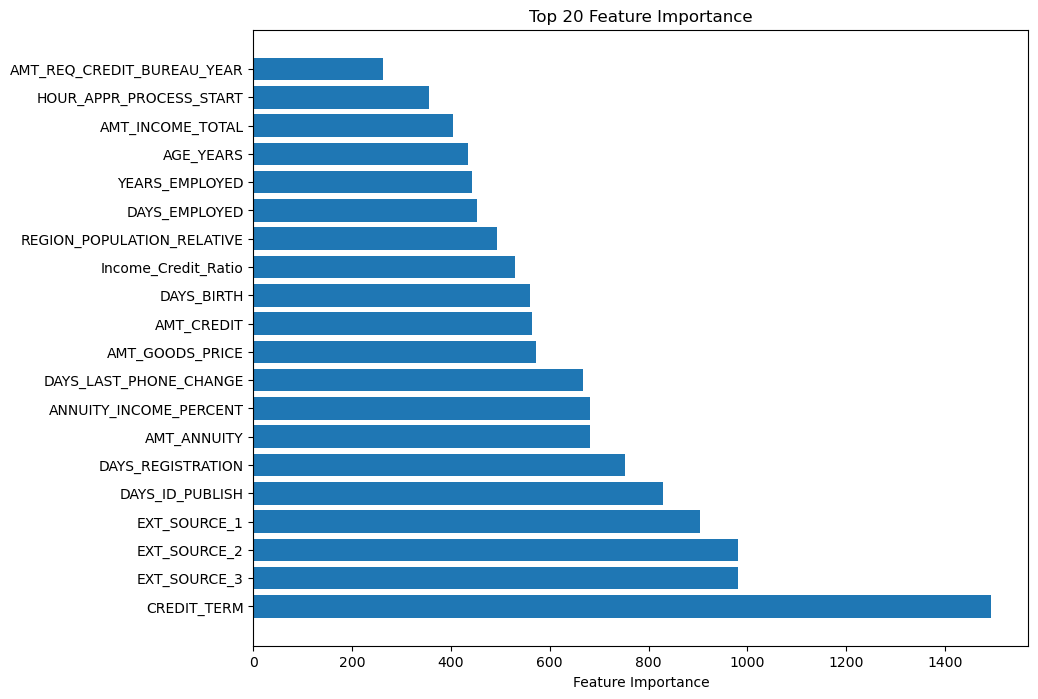

In [248]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

fitted_one_hot_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']

# Fit the OneHotEncoder
fitted_one_hot_encoder.fit(X_train.select_dtypes(include=['object']))

cat_feature_names = fitted_one_hot_encoder.get_feature_names_out(input_features=X_train.select_dtypes(include=['object']).columns)

# Flatten the list of category names
one_hot_feature_names = [f'{col}_{val}' for col, vals in zip(X_train.select_dtypes(include=['object']).columns, fitted_one_hot_encoder.categories_) for val in vals]

# Get the names of numerical features
numeric_feature_names = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Combine the names of one-hot encoded and numerical features
feature_names = one_hot_feature_names + numeric_feature_names

# Extract feature importance from the LightGBM classifier
feature_importance = pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 20 features
top20_feature_importance = feature_importance_df.head(20)

# Plot the top 20 feature importance chart
plt.figure(figsize=(10, 8))
plt.barh(range(len(top20_feature_importance)), top20_feature_importance['Importance'], align='center')
plt.yticks(range(len(top20_feature_importance)), top20_feature_importance['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance')
plt.show()




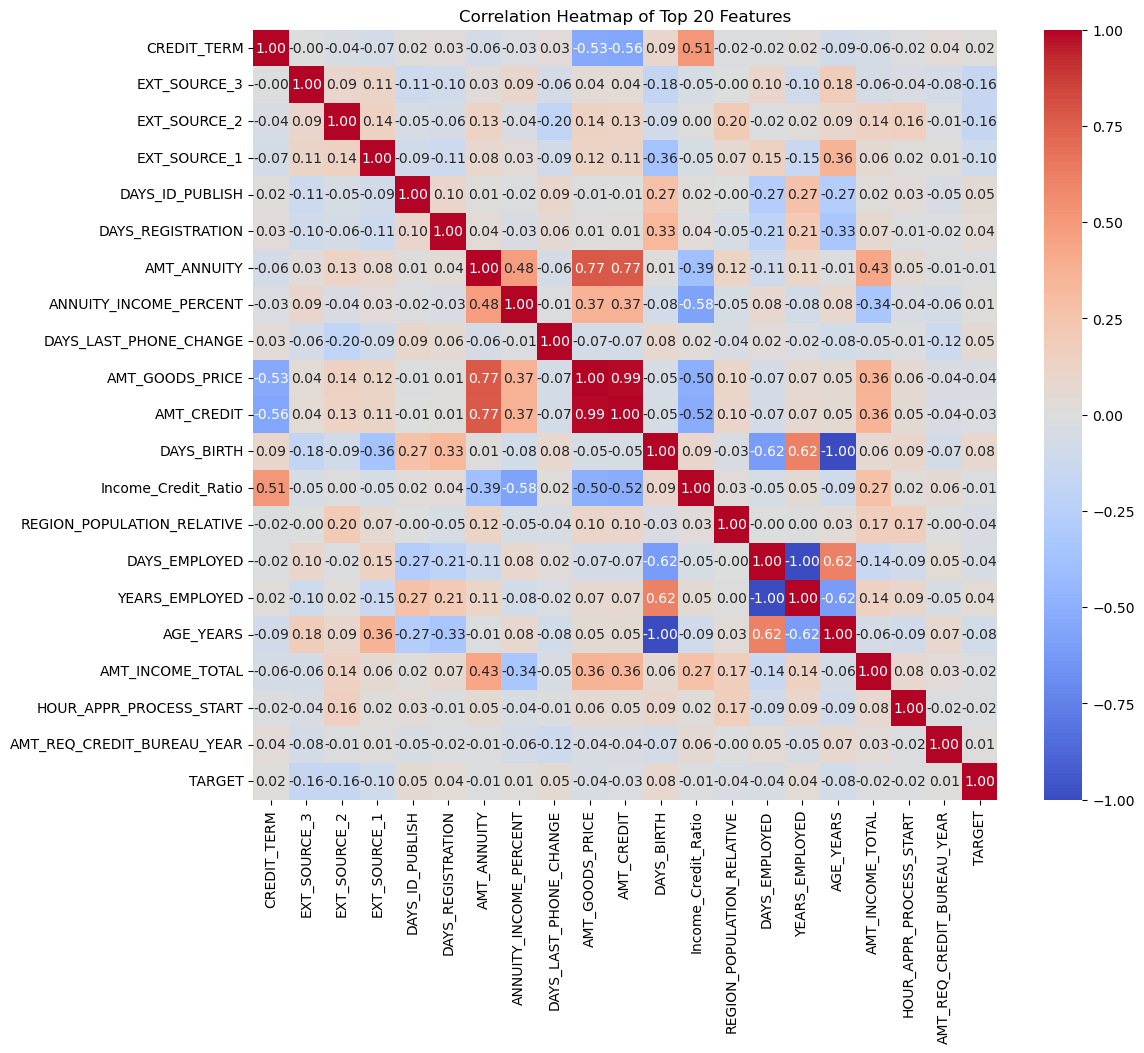

In [252]:
import seaborn as sns

# Select the top 20 features
top20_features = top20_feature_importance['Feature']

# Combine the top 20 features with the target variable
top20_features_with_target = X_train[top20_features]
top20_features_with_target['TARGET'] = y_train

# Calculate the correlation matrix
correlation_matrix = top20_features_with_target.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top 20 Features')
plt.show()



The model's most significant indicators are credit term length, external credit scores, and essential features of the client's profile, such as age and employment history. Financial variables such as annuity amount and loan size, regional demographic data, and recent contact changes all significantly impact projections. The model's results are additionally influenced by the time of the application and credit history within the previous year.

## 5. Results <a name='5'></a>


### 5.1 Predictions on test data <a name='5.1'></a>

We need to match the predictors that were used for the model training to forecast how the models perform on unseen real-world data. As a result, we use the application_test dataset from Kaggle with the same data cleaning and preprocessing.

In [497]:
application_test = pd.read_csv("application_test.csv")
skid = application_test['SK_ID_CURR']
application_test_clean = application_test.drop(columns=missing_cor_columns, axis=1)
application_test_clean.shape


(48744, 77)

In [498]:
# application_test.isna().sum()
for column in application_test_clean.columns:
    if application_test_clean[column].dtype == 'object':
        application_test_clean[column].fillna(application_test_clean[column].mode()[0], inplace=True)

for column in application_test_clean.columns:
    if application_test_clean[column].dtype == 'float':
        application_test_clean[column].fillna(application_test_clean[column].median(), inplace=True)

application_test_clean.isna().sum().sum()
application_test_clean = application_test_clean.drop(columns=selected_columns, axis=1)

#Get Dummies
application_test_clean_backup = application_test_clean # storing the final application_train_final to a dummy variable
application_test_final = pd.get_dummies(application_test_clean)

print(application_test_final.shape)

application_test_final = clean_feature_names(application_test_final)

(48744, 176)


In [499]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns (we'll normalize these)
numeric_columns = application_test_final.select_dtypes(include=[np.number]).columns

# Identify categorical columns for one-hot encoding
categorical_columns = application_test_final.select_dtypes(include=['object']).columns



# Creating a column transformer:
# - StandardScaler for numeric columns to normalize them
# - OneHotEncoder for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Fit and transform the training data
application_test_final_scaled = preprocessor.fit_transform(application_test_final)


# Printing the shapes of the transformed arrays
print(application_test_final_scaled.shape)


(48744, 41)


In [500]:
application_test_final['AGE_YEARS'] = application_test_final['DAYS_BIRTH'] / -365
application_test_final['YEARS_EMPLOYED'] = application_test_final['DAYS_EMPLOYED'] / -365
application_test_final['ANNUITY_INCOME_PERCENT'] = application_test_final['AMT_ANNUITY'] / application_test_final['AMT_INCOME_TOTAL']
application_test_final['CREDIT_TERM'] = application_test_final['AMT_ANNUITY'] / application_test_final['AMT_CREDIT']
application_test_final['Income_Credit_Ratio'] = application_test_final['AMT_INCOME_TOTAL'] / application_test_final['AMT_CREDIT']
application_test_final['Income_squared'] = application_test_final['AMT_INCOME_TOTAL'] ** 2
application_test_final['AGE_BINNED'] = pd.cut(application_test_final['DAYS_BIRTH'] / -365, bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
application_test_final = clean_feature_names(application_test_final)
application_test_final.shape

(48744, 183)

In [501]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns (we'll normalize these)
numeric_columns = application_test_final.select_dtypes(include=[np.number]).columns

# Identify categorical columns for one-hot encoding
categorical_columns = application_test_final.select_dtypes(include=['object']).columns

# Creating a column transformer:
# - StandardScaler for numeric columns to normalize them
# - OneHotEncoder for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Fit and transform the training data
application_test_final_scaled = preprocessor.fit_transform(application_test_final)


# Printing the shapes of the transformed arrays
print(application_test_final_scaled.shape)


(48744, 47)



### 5.2 Model Predictions on application_test data <a name='5.2'></a>


In [507]:

# Tuned model predictions
logistic_regression_test = logistic_regression.predict_proba(application_test_final_scaled)[:, 1]
rf_test = random_forest.predict_proba(application_test_final_scaled)[:, 1]
tuned_rf_test = best_rf.predict_proba(application_test_final_scaled)[:, 1]
# lgbm_test = clf.predict_proba(application_test_final)[:, 1]
tuned_lgbm_test = best_clf.predict_proba(application_test_final_scaled)[:, 1]

# Down sampled model predictions
logistic_regression_test_ds = lr_model_ds.predict_proba(application_test_final_scaled)[:, 1]
rf_test_ds = rf_model_ds.predict_proba(application_test_final_scaled)[:, 1]
tuned_rf_test_ds = rf_model_1_ds.predict_proba(application_test_final_scaled)[:, 1]
lgbm_test_ds = lgb_model_ds.predict_proba(application_test_final_scaled)[:, 1]
tuned_lgbm_test_ds = lgb_model_lt_ds.predict_proba(application_test_final_scaled)[:, 1]

# up sampled model predictions
logistic_regression_test_up = lr_model_up.predict_proba(application_test_final_scaled)[:, 1]
rf_test_up = rf_model_up.predict_proba(application_test_final_scaled)[:, 1]
tuned_rf_test_up = rf_model_1_up.predict_proba(application_test_final_scaled)[:, 1]
lgbm_test_up = lgb_model_up.predict_proba(application_test_final_scaled)[:, 1]
tuned_lgbm_test_up = lgb_model_lt_up.predict_proba(application_test_final_scaled)[:, 1]

### 5.3 Submission File <a name='5.3'></a>

In [527]:
# Setting SKID
skid = application_test['SK_ID_CURR']
final_submission = pd.DataFrame()
final_submission['SK_ID_CURR'] = skid

# Setting Target variable values for Tuned Models in the final submission file
#final_submission['TARGET'] = logistic_regression_test
#final_submission['TARGET'] = tuned_lgbm_test
#final_submission['TARGET'] = rf_test
final_submission['TARGET'] = tuned_rf_test



# Setting Target variable values for Down Sampled Models in the final submission file
#final_submission['TARGET'] = logistic_regression_test_ds
#final_submission['TARGET'] = tuned_rf_test_ds
#final_submission['TARGET'] = lgbm_test_ds
#final_submission['TARGET'] = tuned_lgbm_test_ds
#final_submission['TARGET'] = rf_test_ds


# Setting Target variable values for up Sampled Models in the final submission file
#final_submission['TARGET'] = tuned_lgbm_test_up
#final_submission['TARGET'] = lgbm_test_up
#final_submission['TARGET'] = logistic_regression_test_up 
#final_submission['TARGET'] = rf_test_up
#final_submission['TARGET'] = tuned_rf_test_up

In [528]:
#  final_submission.to_csv("lgbm_test_up.csv",index=False)

## 6. Summary and Interpretations <a name='6'></a>

* Logistic Regression has a moderate differentiating ability with AUC scores around 0.737 and accuracy near 68% but suffers on Kaggle with scores ranging from 0.562 to 0.567, showing low usefulness for complex data sets. 

* Random Forest has strong overfitting, with excellent training scores but inferior test scores (AUC = 0.724, accuracy = 91.9%) and a moderate Kaggle performance of 0.577. Tuned Random Forest improves generalization with matched training and testing metrics (AUC = 0.738, accuracy = 91.9%) and increases Kaggle scores, resulting in 0.63 with upsampling.

* Tuned LGBM possessed the highest test AUC of 0.76 and constant accuracy of 92%, with higher Kaggle scores of 0.58 and additional improvement to 0.63 with up-sampling and 0.61 with down-sampling.

* Sampling techniques lead to much better Random Forest and LGBM outcomes on Kaggle, indicating that data imbalances may be handled effectively.


**Overall, the best kaggle score obtained is 0.63 with the tuned LGBM with randomly up sampled data.**

## 7. Group Members contribution <a name='7'></a>

<!DOCTYPE html>
<html>
<head>
</head>
<body>
    <table border="1">
        <tr style="background-color: #4CAF50; color: white;">
            <th>Name</th>
            <th style="text-align: center;">Contribution's</th>
        </tr>
        <tr>
            <td>Adarsh</td>
            <td> Cross validation, Sampling technqiues up & down sampling, ROC-AUC curves, Feature importance, Model predictions, Test set preparation, 
            Light GBM model & Tuned light GBM model,Fitting Models, Final edits</td>
        </tr>
        <tr>
            <td>Charith</td>
            <td>Exploratory data anlysis,Outlier analysis, Feature Engineering Research & Implementation, Feature Scaling & normalization, Train & Test Splits,Sampling techniques,
            Templates for final prediction, Interpretations, Proof reading and Final edits</td>
        </tr>
        <tr>
            <td>Dheeraj</td>
            <td> Data Preparation, Feature Engineering, Logistic regression model, Random forest and Tuned random forest, Test set preparation, Model predictions, Final predictions,
            ROC-AUC curves, Notebook editing</td>
        </tr>
    </table>
</body>
</html>

<h3><center><b>THE END</b></center></h3>

<center><a href="#Table-of-contents:">Navigate to top</a>